In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Credit_default_dataset.csv


In [2]:
credit_df = pd.read_csv('../input/Credit_default_dataset.csv')

In [3]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
credit_df = credit_df.drop(["ID"],axis=1)

In [5]:
credit_df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [6]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
credit_df["EDUCATION"]=credit_df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
credit_df["MARRIAGE"]=credit_df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [10]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

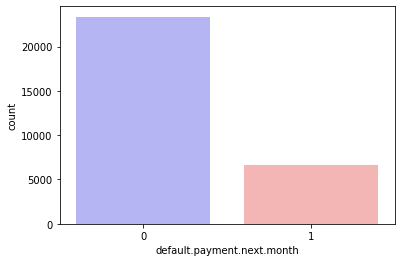

In [13]:
sns.countplot(x="default.payment.next.month", data=credit_df, palette="bwr")
plt.show()

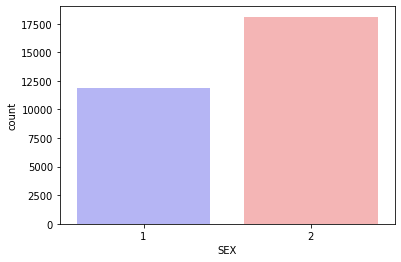

In [15]:
sns.countplot(x="SEX", data=credit_df, palette="bwr")
plt.show()

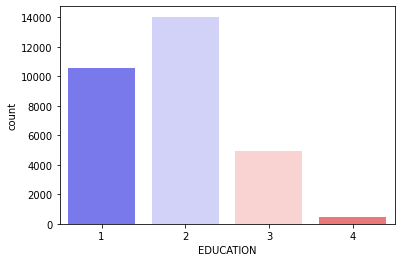

In [16]:
sns.countplot(x="EDUCATION", data=credit_df, palette="bwr")
plt.show()

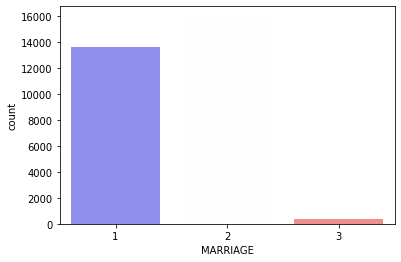

In [17]:
sns.countplot(x="MARRIAGE", data=credit_df, palette="bwr")
plt.show()

In [22]:
credit_df.shape

(30000, 24)

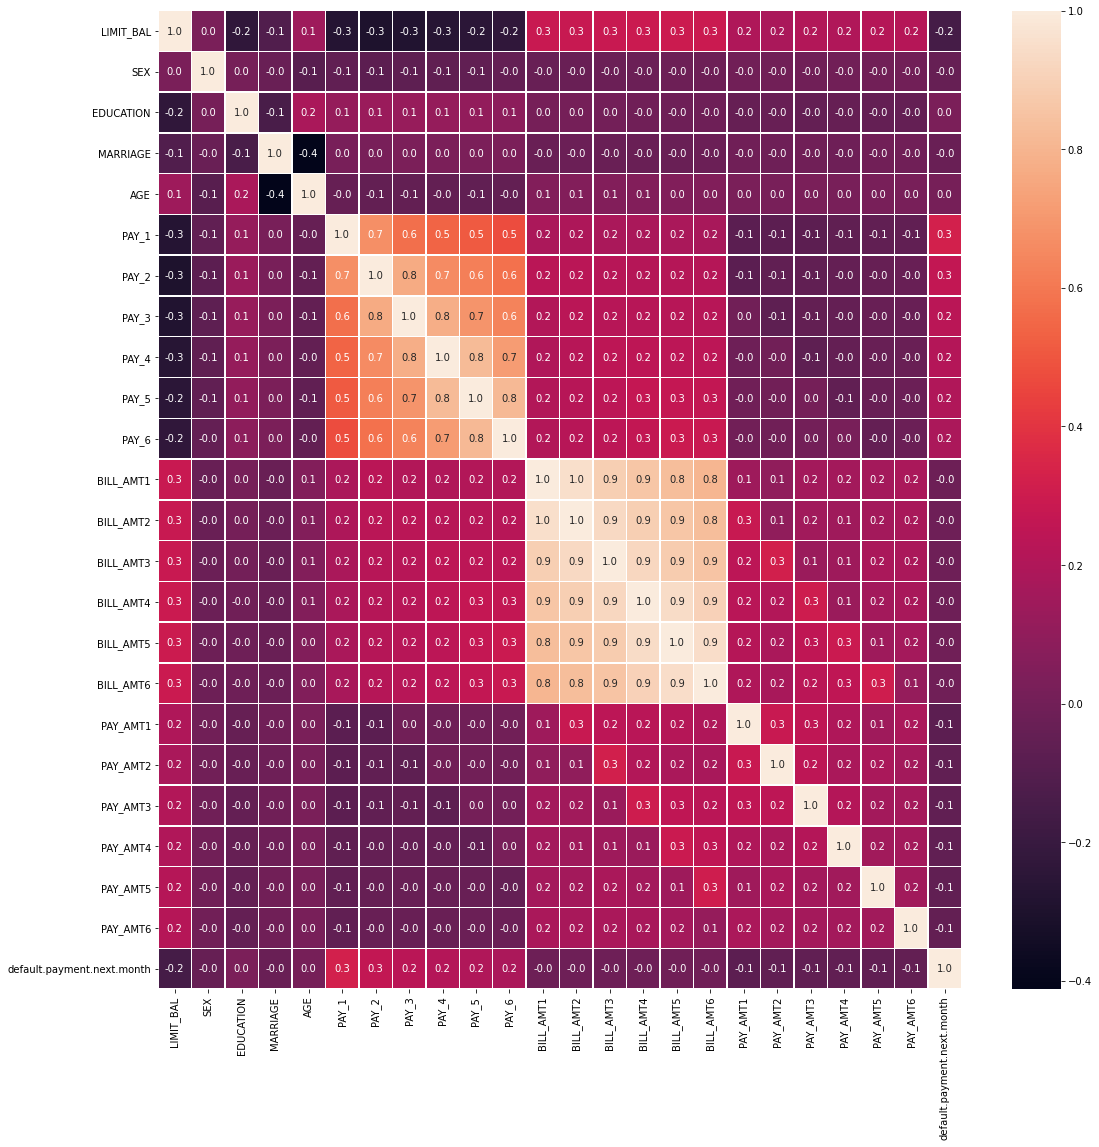

In [23]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(credit_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [24]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=credit_df.drop(['default.payment.next.month'],axis=1)
X=scaling.fit_transform(X)

In [26]:
y=credit_df['default.payment.next.month']

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [29]:
from keras.layers import Dropout

In [33]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=23 , activation= 'relu' ))
# Adding dropout to prevent overfitting
model.add(Dropout(p=0.1))
# Adding the second hidden layer
model.add(Dense(output_dim=13, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(p=0.1))
model.add(Dense(1,  activation= 'sigmoid' ))

In [34]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])


In [35]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.33, epochs=epochs, batch_size=8, verbose=2)

Train on 16079 samples, validate on 7921 samples
Epoch 1/50
 - 4s - loss: 0.4649 - accuracy: 0.8066 - val_loss: 0.4565 - val_accuracy: 0.8066
Epoch 2/50
 - 3s - loss: 0.4485 - accuracy: 0.8112 - val_loss: 0.4492 - val_accuracy: 0.8114
Epoch 3/50
 - 4s - loss: 0.4443 - accuracy: 0.8158 - val_loss: 0.4469 - val_accuracy: 0.8115
Epoch 4/50
 - 3s - loss: 0.4428 - accuracy: 0.8149 - val_loss: 0.4472 - val_accuracy: 0.8116
Epoch 5/50
 - 4s - loss: 0.4395 - accuracy: 0.8179 - val_loss: 0.4463 - val_accuracy: 0.8118
Epoch 6/50
 - 3s - loss: 0.4407 - accuracy: 0.8157 - val_loss: 0.4470 - val_accuracy: 0.8118
Epoch 7/50
 - 3s - loss: 0.4384 - accuracy: 0.8161 - val_loss: 0.4469 - val_accuracy: 0.8118
Epoch 8/50
 - 4s - loss: 0.4402 - accuracy: 0.8164 - val_loss: 0.4452 - val_accuracy: 0.8118
Epoch 9/50
 - 4s - loss: 0.4380 - accuracy: 0.8169 - val_loss: 0.4449 - val_accuracy: 0.8105
Epoch 10/50
 - 4s - loss: 0.4382 - accuracy: 0.8172 - val_loss: 0.4451 - val_accuracy: 0.8123
Epoch 11/50
 - 4s - 

In [36]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[4485,  218],
       [ 829,  468]])

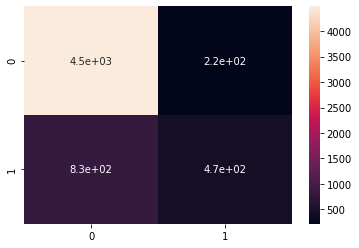

In [39]:
sns.heatmap(cm,annot=True)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8255

In [41]:
accuracy = accuracy_score(y_test,y_pred)*100

In [42]:
accuracy

82.55